<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/FIFA_players_and_teams_analysis_and_match_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
df_players=pd.read_csv('/content/fifa_players.csv')
df_players.head(3)

<ipython-input-4-b3aaf5f781b4>:1: DtypeWarning: Columns (23,26,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_players=pd.read_csv('/content/fifa_players.csv')


,ID,date_id,player_name,Age,Overall rating,Potential,name,Height,Weight,foot,...,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,date,club_name,start_year,end_year
0,239085,240034,Erling Haaland,22,91,94,Manchester City2022 ~ 2027,195,94,Left,...,45.0,88.0,NaN,Power HeaderQuick Step,Acrobatic +,3.0,2024-03-27,Manchester City,2022.0,2027.0
1,231747,240034,Kylian Mbappe,24,91,94,Paris Saint Germain2018 ~ 2024,182,75,Right,...,36.0,78.0,NaN,Finesse ShotRapidFlairTrivelaAcrobaticSolid Pl...,Quick Step +,7.0,2024-03-27,Paris Saint Germain,2018.0,2024.0
2,192985,240034,Kevin De Bruyne,32,91,91,Manchester City2015 ~ 2025,181,75,Right,...,65.0,78.0,NaN,Dead BallPinged PassLong Ball PassWhipped Cros...,Incisive Pass +,9.0,2024-03-27,Manchester City,2015.0,2025.0


In [5]:
df_players.shape

(22304, 82)

In [6]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22304 entries, 0 to 22303
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        22304 non-null  int64  
 1   date_id                   22304 non-null  int64  
 2   player_name               22304 non-null  object 
 3   Age                       22304 non-null  int64  
 4   Overall rating            22304 non-null  object 
 5   Potential                 22304 non-null  object 
 6   name                      22304 non-null  object 
 7   Height                    22304 non-null  int64  
 8   Weight                    22304 non-null  int64  
 9   foot                      22304 non-null  object 
 10  Best overall              22304 non-null  int64  
 11  Best position             22304 non-null  object 
 12  Growth                    22304 non-null  int64  
 13  Joined                    22304 non-null  object 
 14  Loan d

In [7]:
df_players_sorted=df_players[["player_name","Att. Position","Long shots","Attacking work rate","Finishing",]]
df_players_sorted.head(8)

,player_name,Att. Position,Long shots,Attacking work rate,Finishing
0,Erling Haaland,96,86,High,96
1,Kylian Mbappe,93,83,High,94
2,Kevin De Bruyne,88,92,High,85
3,Rodrigo Hernandez Cascante,76,88,High,70
4,Harry Kane,94,87,High,95
5,Thibaut Courtois,13,17,Medium,14
6,Robert Lewandowski,94,84,High,93
7,Lionel Messi,91,90,Low,89


In [8]:
df_top_finishing = df_players[['player_name', 'Finishing']].copy()  # Create a copy to avoid SettingWithCopyWarning
df_top_finishing['Finishing'] = pd.to_numeric(df_top_finishing['Finishing'], errors='coerce')  # Convert 'Finishing' to numeric, handling errors
df_top_finishing = df_top_finishing.sort_values(by='Finishing', ascending=False).drop_duplicates(subset=['player_name'])


df_top_10_finishing = df_top_finishing.head(10)


print(df_top_10_finishing)

              player_name  Finishing
0          Erling Haaland       96.0
4              Harry Kane       95.0
18323       Kylian Mbappe       94.0
18328  Robert Lewandowski       93.0
11          Mohamed Salah       92.0
18       Lautaro Martinez       91.0
26         Victor Osimhen       91.0
18337       Karim Benzema       91.0
18405       Ciro Immobile       90.0
119     Iago Aspas Juncal       90.0


We made a centre-forward scout analysis


In [31]:
# Standing tackle ve Sliding tackle'a göre sıralama
df_top_6number_sorted = df_players.sort_values(by=["Standing tackle", "Sliding tackle"], ascending=False)

# Sonuçları gör (ilk 3 satır)
df_top_6number_sorted.head(3)


,ID,date_id,player_name,Age,Overall rating,Potential,name,Height,Weight,foot,...,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,date,club_name,start_year,end_year
8,239818,240034,Ruben Santos Gato Alves Dias,26,89,90,Manchester City2020 ~ 2027,187,82,Right,...,89.0,87.0,NaN,Power HeaderBlockLeadership,Bruiser +,4.0,2024-03-27,Manchester City,2020.0,2027.0
18330,239818,240035,Ruben Santos Gato Alves Dias,26,89,90,Manchester City2020 ~ 2027,187,82,Right,...,89.0,87.0,NaN,Power HeaderBlockLeadership,Bruiser +,4.0,2024-04-09,Manchester City,2020.0,2027.0
12,203376,240034,Virgil Van Dijk,31,89,89,Liverpool2018 ~ 2025,193,92,Right,...,89.0,86.0,NaN,Power HeaderLong Ball PassJockeyBlockAnticipat...,Aerial +,8.0,2024-03-27,Liverpool,2018.0,2025.0


Our defenders tackling scouting process that fits the features we want

In [12]:
df_teams=pd.read_csv("/content/match_teams.csv")
df_teams.head()

,standing,name,MP,W,D,L,GF,GA,GD,Pts,...,Top Team Scorer,Goalkeeper,Overall,Attack,MidField,Defence,Players,Starting XL average Age,Name,sofifa_id
0,1.0,eng West Ham,6.0,5.0,0.0,1.0,10.0,4.0,6.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,de Freiburg,6.0,4.0,0.0,2.0,17.0,7.0,10.0,12.0,...,NaN,NaN,76.0,76.0,76.0,77.0,27.0,27.91,sc freiburg,25.0
2,3.0,gr Olympiacos,6.0,2.0,1.0,3.0,11.0,14.0,-3.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,rs TSC Bačka Top,6.0,0.0,1.0,5.0,6.0,19.0,-13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,es Barcelona,6.0,5.0,1.0,0.0,27.0,5.0,22.0,16.0,...,NaN,NaN,72.0,73.0,73.0,71.0,26.0,25.82,hellas verona,206.0


In [13]:
df_teams.tail()

,standing,name,MP,W,D,L,GF,GA,GD,Pts,...,Top Team Scorer,Goalkeeper,Overall,Attack,MidField,Defence,Players,Starting XL average Age,Name,sofifa_id
1364,22.0,Newcastle United,20.0,5.0,4.0,11.0,29.0,46.0,-17.0,19.0,...,Kyle Crossley - 7,Jude Smith,80.0,79.0,78.0,78.0,33.0,25.64,newcastle united,13.0
1365,23.0,Manchester City,20.0,4.0,6.0,10.0,32.0,50.0,-18.0,18.0,...,Kane Taylor - 4,True Grant,85.0,86.0,87.0,84.0,28.0,26.82,manchester city,10.0
1366,24.0,Leeds United,20.0,5.0,3.0,12.0,28.0,48.0,-20.0,18.0,...,Luca Thomas - 6,Tristan van den Heuvel,74.0,73.0,74.0,74.0,27.0,23.00,leeds united,8.0
1367,25.0,Everton,20.0,4.0,5.0,11.0,25.0,40.0,-15.0,17.0,...,Francis Okoronkwo - 5,Fraser Barnsley,76.0,78.0,76.0,76.0,31.0,25.18,everton,7.0
1368,26.0,Derby County,20.0,5.0,1.0,14.0,30.0,38.0,-8.0,16.0,...,Dejaune Brown - 6,Jack Thompson,67.0,68.0,67.0,66.0,28.0,28.00,derby county,91.0


In [14]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   standing                 1367 non-null   float64
 1   name                     1369 non-null   object 
 2   MP                       1367 non-null   float64
 3   W                        1367 non-null   float64
 4   D                        1367 non-null   float64
 5   L                        1367 non-null   float64
 6   GF                       1307 non-null   float64
 7   GA                       1307 non-null   float64
 8   GD                       1367 non-null   float64
 9   Pts                      1367 non-null   float64
 10  xG                       445 non-null    float64
 11  xGA                      445 non-null    float64
 12  xGD                      445 non-null    float64
 13  xGD/90                   445 non-null    float64
 14  Notes                   

In [15]:
y=df_teams["Overall"]
x=df_teams[["sofifa_id","MP",	"W"	,"D"	,"L"	,"GF"	,"GA"	,"GD"	,"Pts"]]


<Axes: xlabel='Pts', ylabel='Overall'>

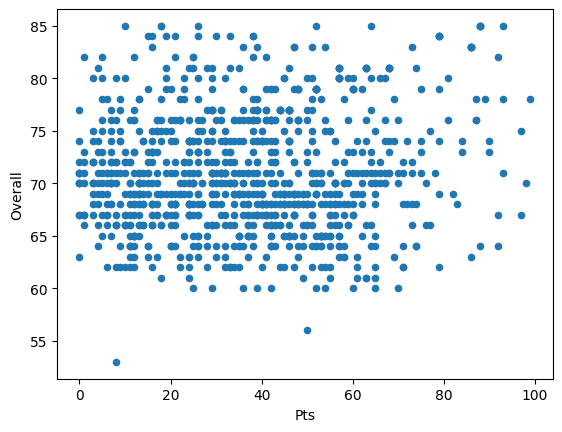

In [38]:
df_teams.plot(x="Pts",y="Overall",kind="scatter")

<Axes: xlabel='MP', ylabel='Overall'>

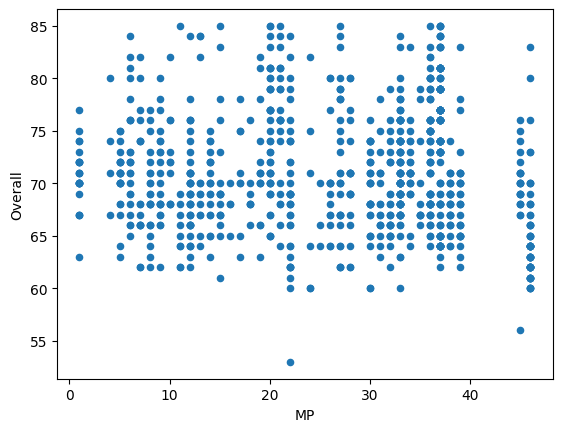

In [39]:
df_teams.plot(x="MP",y="Overall",kind="scatter")

In [34]:
r2=model.score(x,y)
print(r2)

0.4470619452121921


In [35]:
rmse=np.sqrt(np.mean((y-model.predict(x))**2))
print(rmse)

3.5496526478007016


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# ... (Your previous code to load and prepare df_teams) ...

# Impute missing values in the target variable 'Overall' using the mean
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'
y = df_teams["Overall"].values.reshape(-1, 1)  # Convert Series to NumPy array and reshape
#y = df_teams["Overall"].to_numpy().reshape(-1, 1)  # Alternative way to convert Series to NumPy array and reshape
y = imputer.fit_transform(y)
y = y.ravel()  # Flatten back to 1D array

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

y = df_teams["Overall"]
x = df_teams[["MP", "W", "D", "L", "GF", "GA", "GD", "Pts"]]


imputer = SimpleImputer(strategy='mean')


y = imputer.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()

model = RandomForestRegressor()
model.fit(x, y)

x_values = [[12, 20, 12, 7, 16, 12, 24 ,45]]

predicted_overall = model.predict(x_values)

print("Tahmin edilen Overall değeri:", predicted_overall[0])


Tahmin edilen Overall değeri: 70.85065979381442


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


overall value of our own team

overall value of our own team

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

y = df_teams["Overall"]
x = df_teams[["MP", "W", "D", "L", "GF", "GA", "GD", "Pts"]]


imputer = SimpleImputer(strategy='mean')


x = imputer.fit_transform(x)


y = imputer.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()

model = GradientBoostingRegressor()
model.fit(x, y)

x_values = [[12, 20, 12, 7, 16, 12, 24 ,45]]

predicted_overall = model.predict(x_values)

print("Tahmin edilen Overall değeri:", predicted_overall[0])

Tahmin edilen Overall değeri: 71.53710104943548
